# Обучение без учителя

Обучение без учителя это такой подход, в котором нет данных с заранее известным ответом. Типичные задачи при обучении без учителя -это анализ взаимосвязанности в данных и выделение этих взаимосвязей в результатах анализа. Задача регрессии может быть отнесена как раз к задаче обучения с учителем, если используется обучающая выборка, по которой сначала алгоритм настраивается, а затем уже валидируется в ходе испытаний на валидационной выборке. Задачи обучения без учителя содержат как правило одну единственную выборку и по ней проводится анализ, по которому например строится кластерное пространство удобной размерности и в нем уже проводится оценка изначальной структуры данных по наличию кластеров их количеству и пересечению в пространстве.  Центры кластеров - центроиды. Алгоритмы обучения без учителя могут быть использованы совместно с обучением с учителем. Например в качестве анализа принадлежности анализируемого объекта к определенному классу в обучающей выборки и построения как раз той самой выборки из кластерного пространства. 1) построение классификации всех объектов по всем классам согласно кластерам 2) построение классификации каждого отдельно взятого кластера на фоне всех остальных и создание тем самым классификаторов в количестве анализирумых кластеров.

<b>Кластеризация k-means.</b> (Похож на метод ближайших соседей (k nearest neighbours))</br>
Алгоритм работает следующим образом. На начальном этапе задается количество кластеров n_clusters. Это по сути количество предполагаемых центроидов. Ближайшие точки преписываются к этому кластеру, центром которого и является эта центроида. Затем производится усреднение и определяются новые значение центроидов. Принадлежность точек к определенной центроиде определяется на основе близости этой точки к определенной центроиде. Процесс итерационный и производится за несколько итераций. Алгоритм итерируется до тех пор пока координаты центроид не перестанут существенно меняться от итерации к итерации. Также как и в KNN расстояние между объектами определяется на основе расстояния в пространстве признаков. Поэтому все признаки - они же координаты кластерного пространства должны быть нормированы по масштабу разброса.

Создадим свои учебные dataset на основе функции make data. Эта функция создает случайным образом набор данных. В качестве аргументов при этом она принимает ч 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# The function of making N objects for 3 clusters.
# N - objects
# seed - the value of the internal random generator
def make_data (n,seed):
    
    # setting the numpy seed:----------------------------------------------
    np.random.seed(seed)
    
    # making centroids:----------------------------------------------------
    centroid_matrix = np.array([[3,3],[6,9],[9,3]])
    print("log: centroid matrix: {}".format(centroid_matrix))
    
    # setting n modifications for each coordinate of the centroid:---------
    data = np.random.randn(3,2,n)+centroid_matrix.reshape((3,2,1))
    print("log: adding noise to each coordinate: {}".format(data))
    
    # cross swapping data columns:-----------------------------------------
    data = np.swapaxes(data,1,2)
    print("log: swapping axis: {}".format(data))
    
    # removing redundant dimensions:----------------------------------------
    data = data.reshape((-1,2))
    print("log: reshaping: {}".format(data))
    
    # multiplying results:--------------------------------------------------
    data *= np.array([[20,0.5]])
    print("log: multiplying: {}".format(data))
    
    df = pd.DataFrame({'x':data[:,0],'y':data[:,1]},columns=['x','y'])
    df = df.sample(frac=1.0)
    return df


In [2]:
train = make_data(10,42)
test = make_data(10,27)

log: centroid matrix: [[3 3]
 [6 9]
 [9 3]]
log: adding noise to each coordinate: [[[ 3.49671415  2.8617357   3.64768854  4.52302986  2.76584663
    2.76586304  4.57921282  3.76743473  2.53052561  3.54256004]
  [ 2.53658231  2.53427025  3.24196227  1.08671976  1.27508217
    2.43771247  1.98716888  3.31424733  2.09197592  1.5876963 ]]

 [[ 7.46564877  5.7742237   6.0675282   4.57525181  5.45561728
    6.11092259  4.84900642  6.37569802  5.39936131  5.70830625]
  [ 8.39829339 10.85227818  8.98650278  7.94228907  9.82254491
    7.77915635  9.2088636   7.04032988  7.67181395  9.19686124]]

 [[ 9.73846658  9.17136828  8.88435172  8.6988963   7.52147801
    8.28015579  8.53936123 10.05712223  9.34361829  7.23695984]
  [ 3.32408397  2.61491772  2.323078    3.61167629  4.03099952
    3.93128012  2.16078248  2.69078762  3.33126343  3.97554513]]]
log: swapping axis: [[[ 3.49671415  2.53658231]
  [ 2.8617357   2.53427025]
  [ 3.64768854  3.24196227]
  [ 4.52302986  1.08671976]
  [ 2.76584663  1.

Text(0.5, 1.0, 'Train')

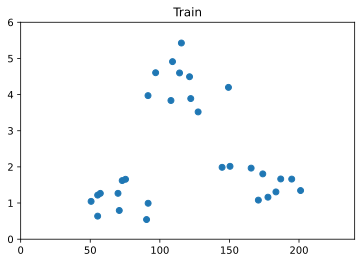

In [3]:
plt.scatter(train['x'],train['y'])
plt.xlim(0,240)
plt.ylim(0,6)
plt.title('Train')

Применим нормализацию данных чтобы устранить разности в разбросах по признакам

Text(0.5, 1.0, 'Train scaled')

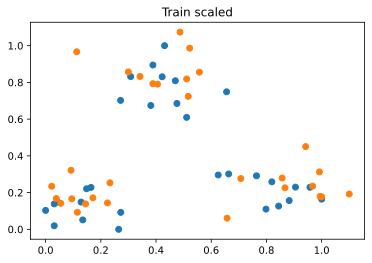

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled,columns=['x','y'])

test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled,columns=['x','y'])

plt.scatter(train_scaled['x'],train_scaled['y'])
plt.scatter(test_scaled['x'],test_scaled['y'])
plt.title('Train scaled')

C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


log: train labels: [2 2 1 1 1 2 0 2 0 1 1 0 0 0 0 0 2 0 2 2 1 0 1 1 2 2 2 0 1 1]
log: cluster centers: [[0.4314873  0.77857028]
 [0.12190576 0.11495728]
 [0.82595794 0.21634417]]


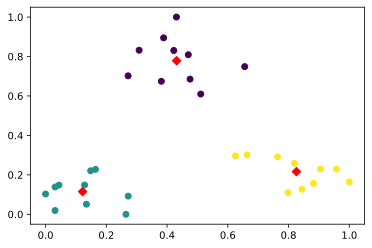

In [5]:
# creating the model:------------------------------------------------
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=100)

# learnig and prediction simultaneously:-----------------------------
train_labels = model.fit_predict(train_scaled)
print ("log: train labels: {}".format(train_labels))

# centers of clusters:-----------------------------------------------
print ("log: cluster centers: {}".format(model.cluster_centers_))

# plotting:----------------------------------------------------------
plt.scatter(train_scaled['x'],train_scaled['y'], c=train_labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='D',color='red')



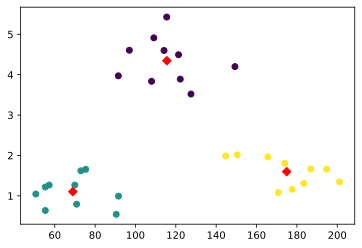

In [6]:
# inverse scaling:-----------------------------------------------------
centers = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(train['x'],train['y'], c=train_labels)
plt.scatter(centers[:,0],centers[:,1],marker='D',color='red')

<b>Иннерция (innertia)</b></br>
Cумма квадратов расстояний до центров кластеров от всех точек отнесенных к ним. Показывает насколько далеко расположены точки от центров своих кластеров. Инерция может быть равна нулю если кластеров столько же сколько и объектов. В этом случае все центроиды разойдутся по координатам соответсвующих им объектов. Величина отлична от нулевого значения если соответственно количество центроидов выбирается либо минимальным это 1, либо некоторым оптимальным значением более 1.

In [7]:
print ("log: inertia: {}".format(model.inertia_))

innertia_control = dict()
for i in range(1,30):
    x_model = KMeans(n_clusters=i, random_state=100)
    x_model.fit(train_scaled)
    innertia_control[i]=x_model.inertia_
print("log: innertia control map: {}".format(innertia_control))


log: inertia: 0.5417377477488047


C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


log: innertia control map: {1: 5.588061070274015, 2: 2.9002641632095454, 3: 0.5417377477488047, 4: 0.42817368911748505, 5: 0.3258659915567972, 6: 0.2673616619363767, 7: 0.20725794455977645, 8: 0.1677417222340906, 9: 0.14671272476076846, 10: 0.11899270135548345, 11: 0.0958665795276624, 12: 0.07670699025674438, 13: 0.06188892573260608, 14: 0.05053853782358124, 15: 0.04208451432433289, 16: 0.03624744315665897, 17: 0.030617068662962738, 18: 0.025764739748039202, 19: 0.020280182090230497, 20: 0.01679947235738158, 21: 0.01252058202062781, 22: 0.009048230664074324, 23: 0.0069650668301723135, 24: 0.0049354579427307865, 25: 0.0035591407624644463, 26: 0.0021882028250864633, 27: 0.0010145709923302935, 28: 0.0002839635694903671, 29: 0.0001300085614692762}


<b>Агломеративная/дивизивная классификации</b></br>
Агломератвивный подход заключается в том, что сначала происходит разбиение всех объектов на количество кластеров, того же количества, что и объектов. Затем итеративным способом количество кластеров постепенно сокращается.</br>
Дивизивный подход заключается в том, что сначала происходит разбиение всех объектов на количество кластеров равного 1, а затем дроблением уже достигается увеличение кластеров с последующим перерасчетом центроидов</br>
Интересно если эти два подхода пустить на встречу друг другу то на середине итеративного пути получится ли наиболее подходящий результат или нет??? Пересечение итераций даст большую истину по середине???</br>
https://scikit-learn.org/stable/modules/clustering.html

log: train labels: [8 3 2 5 2 0 1 3 9 5 2 1 6 4 6 1 0 1 3 0 7 1 7 2 0 8 8 4 7 2]


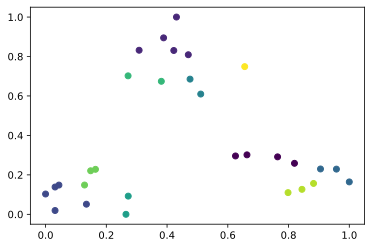

In [12]:
# AGGLOMERATIVE:--------------------------------------------------------------------------
from sklearn.cluster import AgglomerativeClustering
agglomerative_model = AgglomerativeClustering(n_clusters=10)
train_labels = agglomerative_model.fit_predict(train_scaled)
print("log: train labels: {}".format(train_labels))

plt.scatter(train_scaled['x'],train_scaled['y'], c=train_labels)
#plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='D',color='red')

C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_bisect_k_means.py:259: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


log: train labels: [1 1 0 0 0 1 2 1 2 0 0 2 2 2 2 2 1 2 1 1 0 2 0 0 1 1 1 2 0 0]


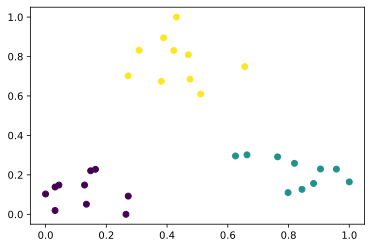

In [13]:
# BISECTING:----------------------------------------------------------------------------
# pip install --upgrade scikit-learn
from sklearn.cluster import BisectingKMeans

bisect_means = BisectingKMeans(n_clusters=3, random_state=0);

train_labels = bisect_means.fit_predict(train_scaled)
print("log: train labels: {}".format(train_labels))

plt.scatter(train_scaled['x'],train_scaled['y'], c=train_labels)



<b>Пример совместного использования обучения без учителя и обучения с учителем</b>

log: train labels: [1 1 0 0 0 1 2 1 2 0 0 2 2 2 2 2 1 2 1 1 0 2 0 0 1 1 1 2 0 0]


C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_bisect_k_means.py:259: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


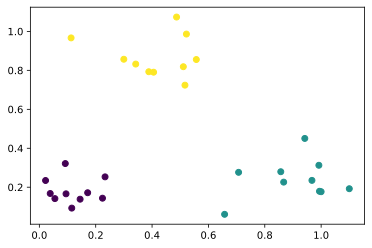

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# cluster approach:---------------------------------------------------
bisect_means = BisectingKMeans(n_clusters=3, random_state=0);
train_labels = bisect_means.fit_predict(train_scaled)
print("log: train labels: {}".format(train_labels))

# using cluster info=>train_labels for adapting KNN:------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled,train_labels)
test_labels = knn.predict(test_scaled)
plt.scatter(test_scaled['x'],test_scaled['y'], c=test_labels)

# Понижение размерности

При анализе данных возникают такие ситуации когда информация об объекте размазана по ряду координат анализируемого вектора. Например это множество индикаторных dummy переменных. Это называется разряженные данные. При этом часть таких признаков имеет жесткую корреляцию между собой.На большом количестве признаков сложно строить модели. Применяется сжатие. Один из алгоритмов это АГК (К.Пирсон). В него входит вычисление собственных значений и векторов для корреляционной матрицы. АГК может быть чувствителен к масштабным значениям признаков.

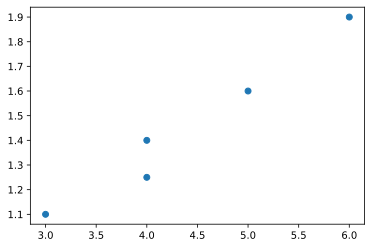

In [15]:
houses = np.array([[5,1.6],[4,1.4],[6,1.9],[3,1.1],[4,1.25]])
plt.scatter(houses[:,0],houses[:,1])

Данные, указанные ниже могут быть сжаты при линейной аппроксимации.Основная информация об этих данных это расстояние до аппроксимирующей прямой линии.</br>


In [16]:
# calculating mean value:-------------------------------------------
mean_values = np.mean(houses,axis=0)

# centering data:---------------------------------------------------
houses_centered = houses - mean_values

# calculating covariance with TRANSPONENT matrix:-------------------
covariance_matrix = np.cov(houses_centered.T)
print("log: cov: {}".format(covariance_matrix))

assert(covariance_matrix[0][0]==np.var(houses_centered[:,0],ddof=1))
assert(covariance_matrix[1][1]==np.var(houses_centered[:,1],ddof=1))

# eigen values:-----------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("log: e_val={}, e_vec={}".format(eigenvalues,eigenvectors))




log: cov: [[1.3    0.35  ]
 [0.35   0.0975]]
log: e_val=[1.39445221 0.00304779], e_vec=[[ 0.96546225 -0.26054298]
 [ 0.26054298  0.96546225]]


собственные значения всегда располагаются в убывающем порядке. Малые значениия можно и вовсе не учитывать. Сделаем разложения по первому вектору

In [17]:
result_pre = np.dot(houses_centered,eigenvectors[:,0])
result_pre = result_pre.reshape(-1,1)
print("log: scaled vectors: {}".format(result_pre))

log: scaled vectors: [[ 0.6183588 ]
 [-0.39921205]
 [ 1.66198394]
 [-1.44283719]
 [-0.4382935 ]]


In [18]:
# Using PCA from the sklearn:------------------------------------
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
result_pca = pca.fit_transform(houses)
print("log: result standard PCA: {}".format(result_pca))
print("log: explained variance ratio: {}".format(pca.explained_variance_ratio_))

# Variance ratio shows the value of skipped infornation when PCA is applied
#

log: result standard PCA: [[ 0.6183588 ]
 [-0.39921205]
 [ 1.66198394]
 [-1.44283719]
 [-0.4382935 ]]
log: explained variance ratio: [0.99781911]


<b>Модель классификации на основе PCA</b><br>
В этой модели используем анализ главных компонент, как средство сжатия обучающей выборки

In [19]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
df = df.set_index("PassengerId")
y = df['Survived']

x = df.drop('Survived',axis=1)
x = x.drop(['Cabin','Name','Ticket'],axis=1)
x['Age'] = x['Age'].fillna(x['Age'].mean())
x['Embarked'] = x['Embarked'].fillna(x['Embarked'].mode()[0])
x['Sex']=(x['Sex']=='female').astype(int)
x = pd.get_dummies(x)
x['Pclass'] = x['Pclass'].astype('category')
x = pd.get_dummies(x)

# Dividing the original data to train and validation data
# lets make the simplest model and comparing their quality with the more sophisticate algorithm
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.25,random_state=42)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int32  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [20]:
from sklearn.preprocessing import StandardScaler

#additional scaling:------------------------------------------------------------
# It's known that PCA centers properties and functions with zero mean value. That is
# why we don't need to centrify property yourself
scaler = StandardScaler(with_mean=False)

x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_train.columns)

pca = PCA (random_state=100)
pca.fit(x_train_scaled)

PCA(random_state=100)

In [21]:
# calculating the information value of the first 7th components
np.sum(pca.explained_variance_ratio_[:7])

0.916587750440676

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# lets build logistic regression for PCA:-------------------------------------

pca = PCA(n_components=7,random_state=100)
x_train_mc = pca.fit_transform(x_train_scaled)
x_valid_mc = pca.transform(x_valid_scaled)

lr = LogisticRegression()

lr.fit(x_train_mc,y_train)
y_pred = lr.predict(x_valid_mc)
accuracy_score(y_valid,y_pred)

0.8026905829596412

# Алгоритм TSNE

t-distributed stochastic neighbor embedding. Lourence van der Maaten J. Hinton 2008.<br>
С помощью tsne можно сжимать данные и строить 2d и 3d визуализациии. Если объекты в выборке имеют большое количество признаков, то можно построить представление о них. Так же строятся кластеры и имеется возможность определелять их количество кластеров

In [23]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()
x = pd.DataFrame(boston.data,columns=boston.feature_names)
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [24]:
price = boston.target
x_train,x_test,y_train,y_test=train_test_split(x,price,test_size=0.3,random_state=7)
print("log: x_train: {}".format(x_train.shape))
print("log: x_test: {}".format(x_test.shape))
print("log: y_train: {}".format(y_train.shape))
print("log: y_test: {}".format(y_test.shape))

log: x_train: (354, 13)
log: x_test: (152, 13)
log: y_train: (354,)
log: y_test: (152,)


In [25]:
from sklearn.preprocessing import StandardScaler

# scaling:----------------------------------------------------------------
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)


C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


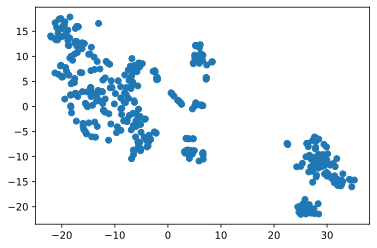

In [26]:
# learning rate influences on cluster density
tsne = TSNE(n_components=2,learning_rate=150,random_state=100)
x_train_tsne = tsne.fit_transform(x_train_scaled)
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1])

C:\Users\Alex\DevProgs\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Log: counts: 0    232
1    122
dtype: int64


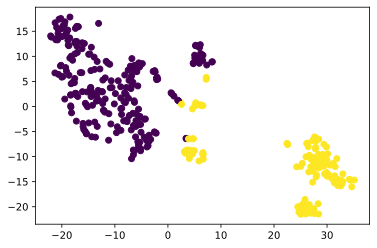

In [27]:
# divide on two clusters:-------------------------------------------------
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
labels_train = kmeans.fit_predict(x_train_scaled)
print ("Log: counts: {}".format(pd.value_counts(labels_train)))
labels_test = kmeans.predict(x_test_scaled)

plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1],c=labels_train)

log: y-train-mean:22.595762711864406
log: y-train-mean-cluster-1:25.94439655172414
log: y-train-mean-cluster-2:16.227868852459018


(array([0.02550091, 0.0291439 , 0.04371585, 0.08014572, 0.08378871,
        0.05464481, 0.06557377, 0.01821494, 0.01821494, 0.        ,
        0.01092896, 0.00364299, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01092896]),
 array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
        25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
        45.5 , 47.75, 50.  ]),
 <BarContainer object of 20 artists>)

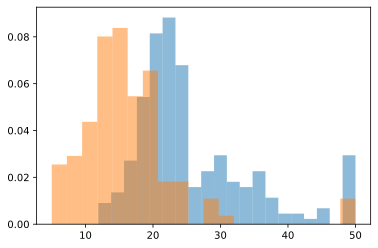

In [31]:
# manual price research:----------------------------------------------------------
print("log: y-train-mean:{}".format(y_train.mean()))
print("log: y-train-mean-cluster-1:{}".format(y_train[labels_train==0].mean()))
print("log: y-train-mean-cluster-2:{}".format(y_train[labels_train==1].mean()))

plt.hist(y_train[labels_train==0],bins=20,density=True,alpha=0.5)
plt.hist(y_train[labels_train==1],bins=20,density=True,alpha=0.5)

log: room number 1: 6.448517241379314
log: room number 2: 5.909286885245898
log: criminality 1: 0.26798159482758627
log: criminality 2: 9.05679418032787
log: nitrooxygen 1: 0.48874870689655103
log: nitrooxygen 2: 0.6754180327868856


(array([ 1.45074713,  0.        ,  3.38507665,  7.25373567,  5.31940616,
         7.25373567,  0.        ,  1.45074713,  4.83582378, 10.15522994,
         7.25373567,  0.        ,  3.86865903,  0.        ,  1.45074713,
         0.        ,  0.        ,  0.        ,  0.        ,  5.31940616]),
 array([0.532  , 0.54895, 0.5659 , 0.58285, 0.5998 , 0.61675, 0.6337 ,
        0.65065, 0.6676 , 0.68455, 0.7015 , 0.71845, 0.7354 , 0.75235,
        0.7693 , 0.78625, 0.8032 , 0.82015, 0.8371 , 0.85405, 0.871  ]),
 <BarContainer object of 20 artists>)

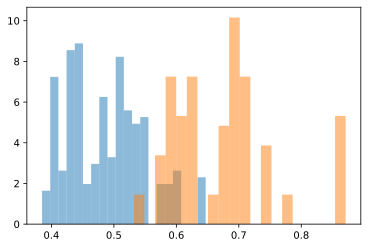

In [37]:
#manual price property research:--------------------------------------------------
print("log: room number 1: {}".format(x_train.loc[labels_train==0,'RM'].mean()))
print("log: room number 2: {}".format(x_train.loc[labels_train==1,'RM'].mean()))
print("log: criminality 1: {}".format(x_train.loc[labels_train==0,'CRIM'].mean()))
print("log: criminality 2: {}".format(x_train.loc[labels_train==1,'CRIM'].mean()))
print("log: nitrooxygen 1: {}".format(x_train.loc[labels_train==0,'NOX'].mean()))
print("log: nitrooxygen 2: {}".format(x_train.loc[labels_train==1,'NOX'].mean()))

plt.hist(x_train.loc[labels_train==0,'NOX'],bins=20,density=True,alpha=0.5)
plt.hist(x_train.loc[labels_train==1,'NOX'],bins=20,density=True,alpha=0.5)


<b>Пример для LinearRegression</b>

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_test_pred = lr.predict(x_test_scaled)
print("log: r2 = {}".format(r2_score(y_test,y_test_pred)))

log: r2 = 0.6508417720329545


<b>Пример для двойной LinearRegression</b>

In [41]:
# analyzing cluster 1:----------------------------------------
lr.fit(x_train_scaled.loc[labels_train==0,:],y_train[labels_train==0])
y_test_pred_0 = lr.predict(x_test_scaled.loc[labels_test==0,:])
print("log: cluster1 r2: {}".format(r2_score(y_test[labels_test==0],y_test_pred_0)))

# analyzing cluster 2:-----------------------------------------
lr.fit(x_train_scaled.loc[labels_train==1,:],y_train[labels_train==1])
y_test_pred_1 = lr.predict(x_test_scaled.loc[labels_test==1,:])
print("log: cluster2 r2: {}".format(r2_score(y_test[labels_test==1],y_test_pred_1)))

# combining results:-------------------------------------------
y_test_all = np.hstack([ y_test[labels_test==0], y_test[labels_test==1] ])
y_test_pred_all = np.hstack([ y_test_pred_0, y_test_pred_1 ])
print("log: combined result: {}".format(r2_score(y_test_all,y_test_pred_all)))


log: cluster1 r2: 0.8316034335298438
log: cluster2 r2: 0.6458127429551196
log: combined result: 0.8055877528812476


Раздельный регрессионный анализ по каждому кластеру дает более точный результат. Это видно по дополненным коллекциями ответов модели